In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split

In [2]:
flood=pd.read_csv('kerala.csv.xls')

In [3]:
df=flood.copy()

In [4]:
df.drop('SUBDIVISION',axis=1,inplace=True)

In [5]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


In [6]:
df.shape

(118, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 14.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,118.0,1959.500000,34.207699,1901.0,1930.250,1959.50,1988.750,2018.0
JAN,118.0,12.218644,15.473766,0.0,2.175,5.80,18.175,83.5
FEB,118.0,15.633898,16.406290,0.0,4.700,8.35,21.400,79.0
MAR,118.0,36.670339,30.063862,0.1,18.100,28.40,49.825,217.2
APR,118.0,110.330508,44.633452,13.1,74.350,110.40,136.450,238.0
MAY,118.0,228.644915,147.548778,53.4,125.050,184.60,264.875,738.8
JUN,118.0,651.617797,186.181363,196.8,535.550,625.60,786.975,1098.2
JUL,118.0,698.220339,228.988966,167.5,533.200,691.65,832.425,1526.5
AUG,118.0,430.369492,181.980463,178.6,316.725,386.25,500.100,1398.9
SEP,118.0,246.207627,121.901131,41.3,155.425,223.55,334.500,526.7


In [8]:
df.isnull().sum()

YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

- There is no null values in the dataset

In [12]:
df['FLOODS'].value_counts()

FLOODS
YES    60
NO     58
Name: count, dtype: int64

In [5]:
df['FLOODS'] = df['FLOODS'].replace({'YES':1,'NO':0})

- Changing the values in flood column YES,NO to 1,0

In [12]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0


In [13]:
df.FLOODS.value_counts()

FLOODS
1    60
0    58
Name: count, dtype: int64

In [16]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [6]:
df.rename(columns={' ANNUAL RAINFALL':'ANNUAL RAINFALL'},inplace=True)

In [18]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [15]:
df[['FLOODS','ANNUAL RAINFALL']].groupby('FLOODS').mean()

,ANNUAL RAINFALL
FLOODS,
0,2569.932759
1,3269.028333



- Average annual rainfall when **flood = 0** is 2569.932759
- Average annual rainfall when **flood = 1** 3269.028333

In [17]:
df[df['ANNUAL RAINFALL']>3500]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1
23,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,289.1,176.5,162.9,50.4,4226.4,1
32,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3,4072.9,1
45,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3,3565.5,1
58,1959,3.0,21.4,6.3,150.7,347.2,872.8,1155.7,397.3,405.5,200.4,151.9,34.0,3746.0,1
60,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,399.3,274.2,85.9,17.5,4257.8,1
117,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1


In [46]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048,-0.202548
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648,0.145313
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457,-0.035730
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103,0.086739
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358,0.034392
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723,0.242813
JUN,-0.174938,0.189375,0.054114,0.019000,0.072990,0.001235,1.000000,0.094939,-0.014549,-0.052634,0.001156,0.015967,-0.085188,0.453407,0.442531
JUL,-0.223403,0.034423,0.005789,0.018330,0.014977,-0.046518,0.094939,1.000000,0.154467,0.209441,0.025223,-0.028526,-0.013573,0.651990,0.442774
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036,0.286690
SEP,0.107655,-0.113502,0.066317,0.143850,0.012928,0.116860,-0.052634,0.209441,0.098215,1.000000,-0.032348,-0.027615,-0.011007,0.428344,0.376385


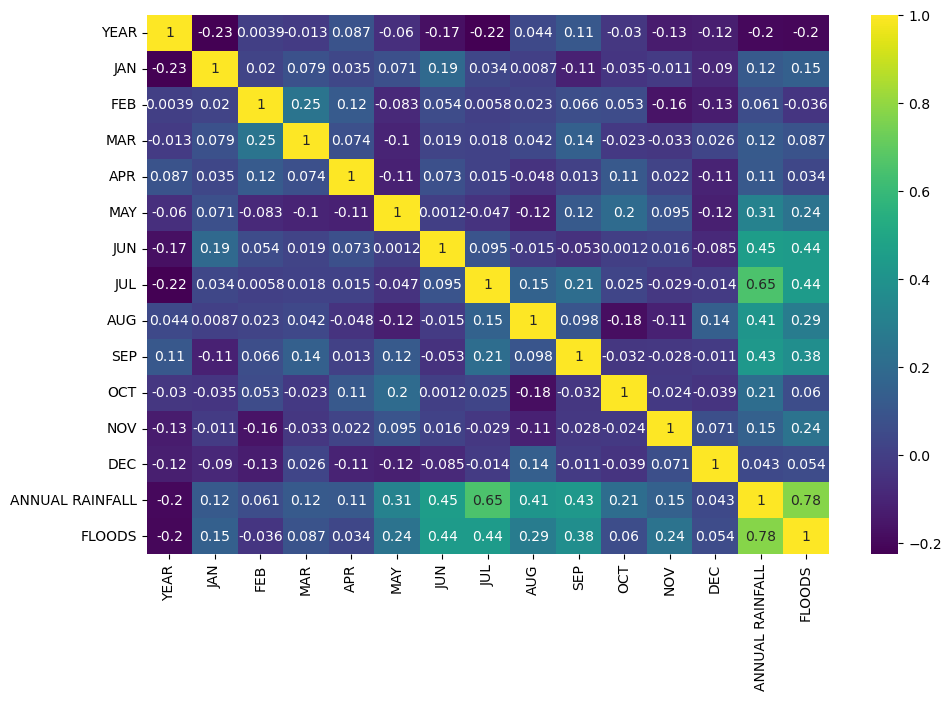

In [64]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='viridis')
plt.show()

In [65]:
rainy_sn = df[['YEAR','JUN','JUL','FLOODS']]
rainy_sn

,YEAR,JUN,JUL,FLOODS
0,1901,824.6,743.0,1
1,1902,390.9,1205.0,1
2,1903,558.6,1022.5,1
3,1904,1098.2,725.5,1
4,1905,850.2,520.5,0
...,...,...,...,...
113,2014,454.4,677.8,1
114,2015,563.6,406.0,0
115,2016,522.2,412.3,0
116,2017,498.5,319.6,0


Here we took the main rainy months

In [66]:
rainy_sn['JUN_GT_500']=(rainy_sn['JUN']>500).astype('int')
rainy_sn['JUL_GT_500']=(rainy_sn['JUL']>500).astype('int')

In [70]:
rainy_sn.head()

,YEAR,JUN,JUL,FLOODS,JUN_GT_500,JUL_GT_500
0,1901,824.6,743.0,1,1,1
1,1902,390.9,1205.0,1,0,1
2,1903,558.6,1022.5,1,1,1
3,1904,1098.2,725.5,1,1,1
4,1905,850.2,520.5,0,1,1


In [69]:
JUN_JUL_gt500=rainy_sn.loc[:,['YEAR','JUN_GT_500','JUL_GT_500','FLOODS']]
JUN_JUL_gt500

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS
0,1901,1,1,1
1,1902,0,1,1
2,1903,1,1,1
3,1904,1,1,1
4,1905,1,1,0
...,...,...,...,...
113,2014,0,1,1
114,2015,1,0,0
115,2016,1,0,0
116,2017,0,0,0


In [7]:
mnths = df.loc[:,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
mnths.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [13]:
sns.set_style(style='dark')

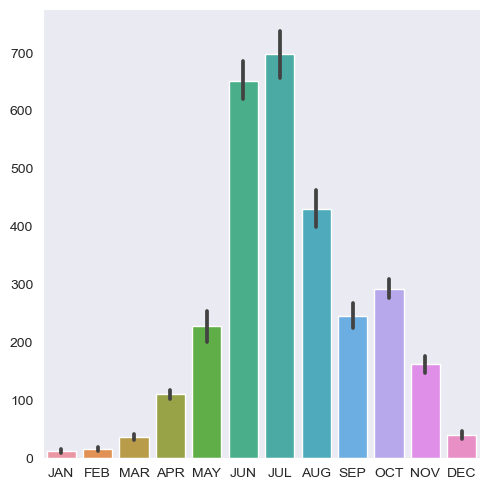

In [16]:
sns.catplot(data=mnths,kind='bar')
plt.show()

In [20]:
df['ANNUAL RAINFALL'].median()

2934.3

- Median Annual Rainfall is 2934.3

In [21]:
df.loc[df['ANNUAL RAINFALL'].argmax(),['YEAR']]

YEAR    2018.0
Name: 117, dtype: float64

In [22]:
df[df['YEAR']==2018].loc[:,['ANNUAL RAINFALL']]

,ANNUAL RAINFALL
117,4473.0


- The highest rainfall in the year 2018
- Its 4473

In [23]:
df['ANNUAL RAINFALL'].min()

2068.8

In [24]:
import scipy as sp

In [25]:
df['JAN'].mode()

0    2.4
Name: JAN, dtype: float64

In [26]:
sp.stats.mode(df['JAN'])

ModeResult(mode=2.4, count=5)

In [27]:
sp.stats.mode(df['FLOODS'])

ModeResult(mode=1, count=60)

In [28]:
df['ANNUAL RAINFALL'].quantile(0.25)   #Q1

2613.525

In [29]:
df['ANNUAL RAINFALL'].quantile(0.50)   #Q2

2934.3

In [30]:
df['ANNUAL RAINFALL'].quantile(0.75)   #Q3

3170.3999999999996

In [31]:
df['ANNUAL RAINFALL'].quantile(0)      #min

2068.8

In [32]:
df['ANNUAL RAINFALL'].quantile(1)      #max

4473.0

In [33]:
sp.stats.iqr(df['ANNUAL RAINFALL'])    #IQR = Q3-Q1

556.8749999999995

In [34]:
numeric=df.select_dtypes({'int64','float64'})

In [35]:
numeric.mean()

YEAR               1959.500000
JAN                  12.218644
FEB                  15.633898
MAR                  36.670339
APR                 110.330508
MAY                 228.644915
JUN                 651.617797
JUL                 698.220339
AUG                 430.369492
SEP                 246.207627
OCT                 293.207627
NOV                 162.311017
DEC                  40.009322
ANNUAL RAINFALL    2925.405085
FLOODS                0.508475
dtype: float64

- Average value of all columns in numeric dataset

In [36]:
df['ANNUAL RAINFALL'].var()   #it is a squared value

204457.17245255687

In [37]:
df['ANNUAL RAINFALL'].std()   #square root

452.16940680740095

In [38]:
df['ANNUAL RAINFALL'].mean()

2925.4050847457625

In [39]:
(452.16940680740095)-(2925.4050847457625*1)  #1st std (69% confidence)

-2473.2356779383617

In [40]:
(452.16940680740095)-(2925.4050847457625*2)  #2nd std (96% confidence)

-5398.640762684124

In [41]:
(452.16940680740095)-(2925.4050847457625*3)  #3rd std  (99% confidence)

-8324.045847429887

In [42]:
numeric.skew()

YEAR               0.000000
JAN                2.166847
FEB                1.600309
MAR                2.399503
APR                0.321424
MAY                1.367000
JUN                0.185841
JUL                0.454143
AUG                2.374332
SEP                0.317092
OCT                0.410562
NOV                0.573042
DEC                1.552651
ANNUAL RAINFALL    0.654133
FLOODS            -0.034341
dtype: float64

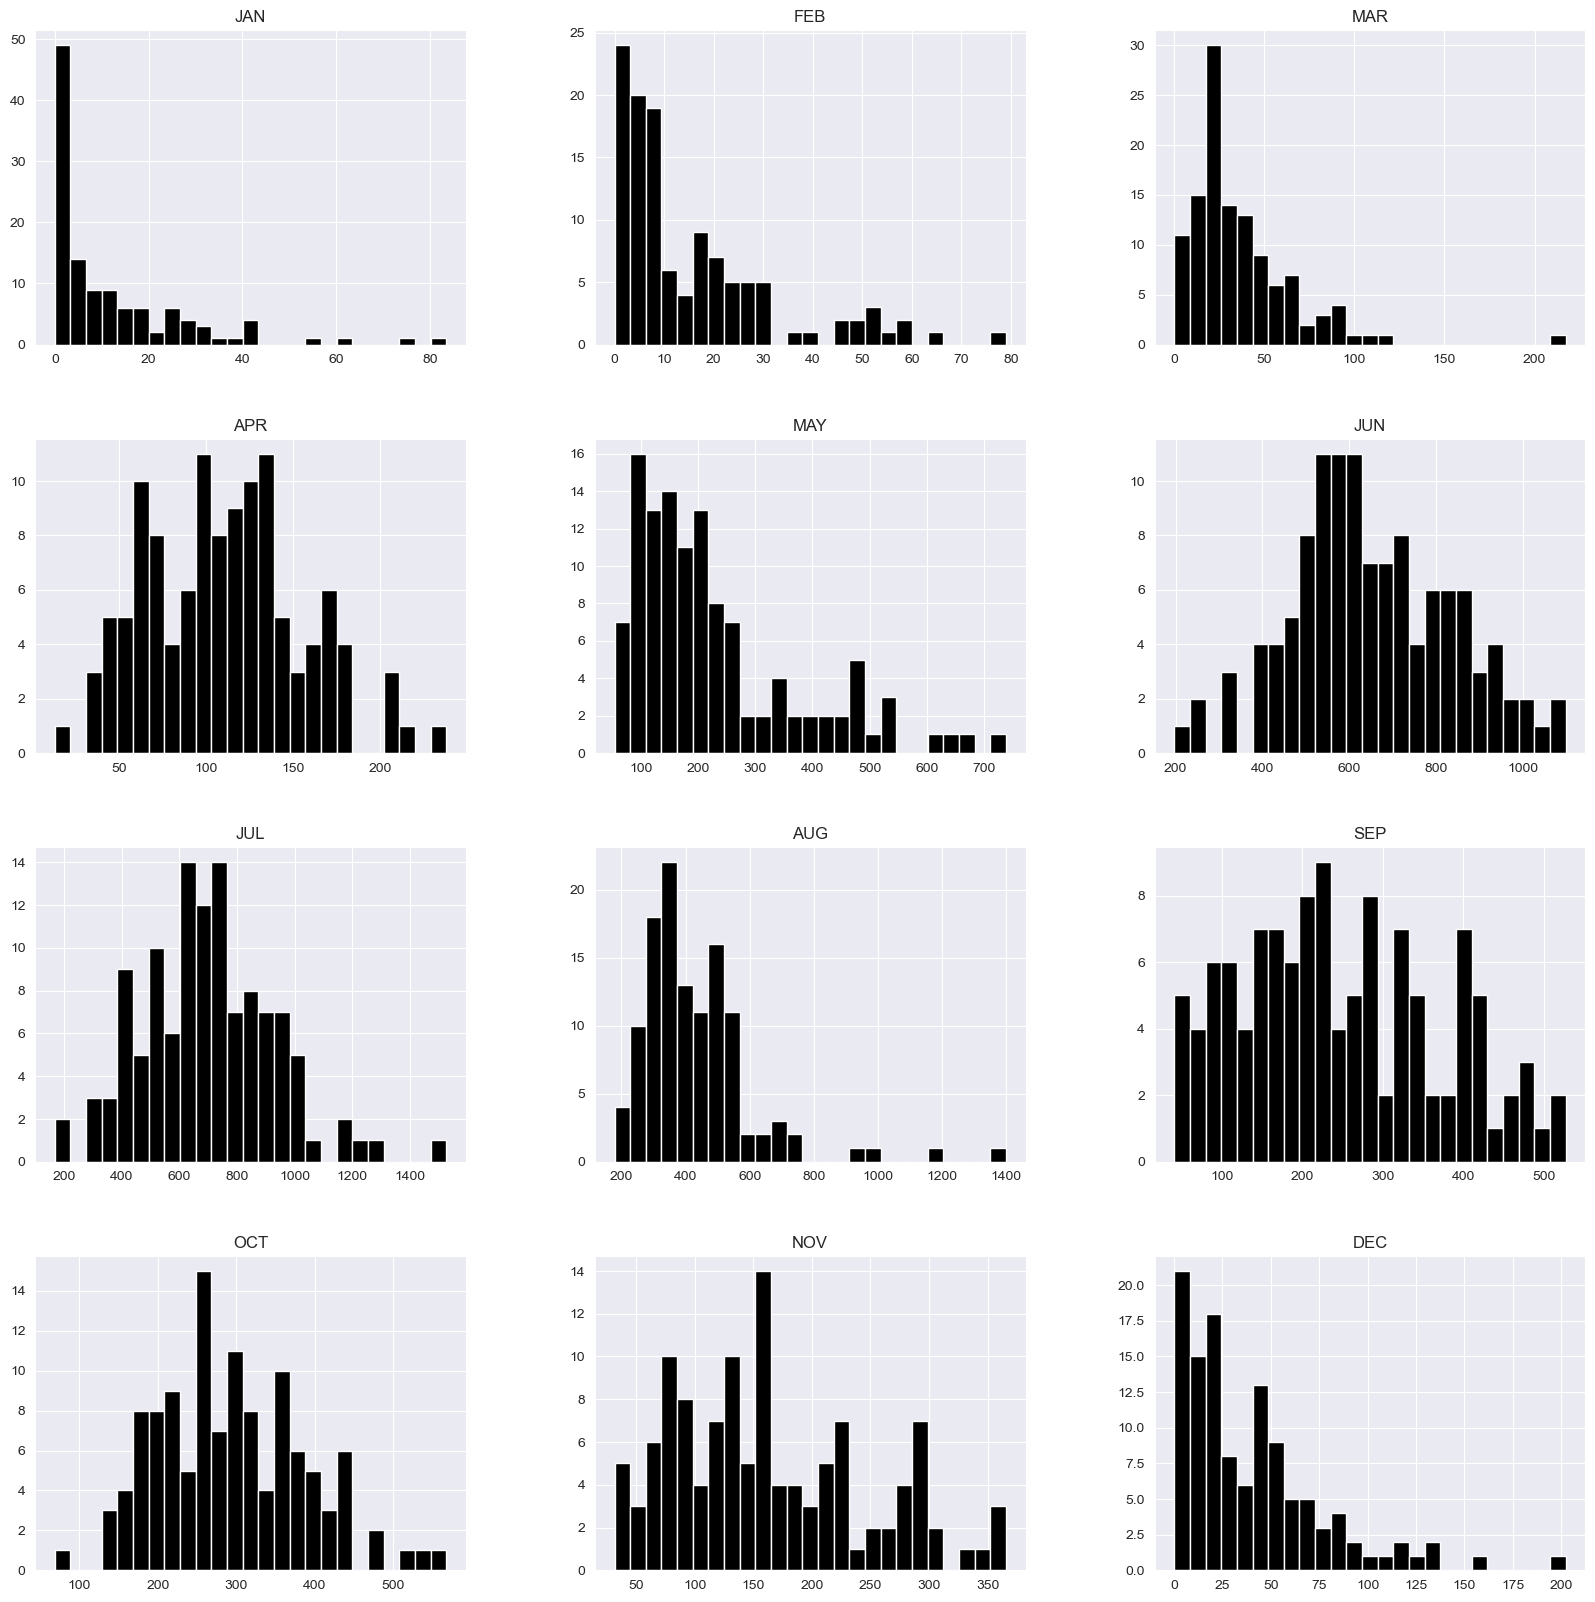

In [82]:
mnths.hist(bins=25,figsize=(20,20),color='k')
plt.show()

In [93]:
df.FLOODS.value_counts()

FLOODS
1    60
0    58
Name: count, dtype: int64

<Axes: xlabel='FLOODS', ylabel='count'>

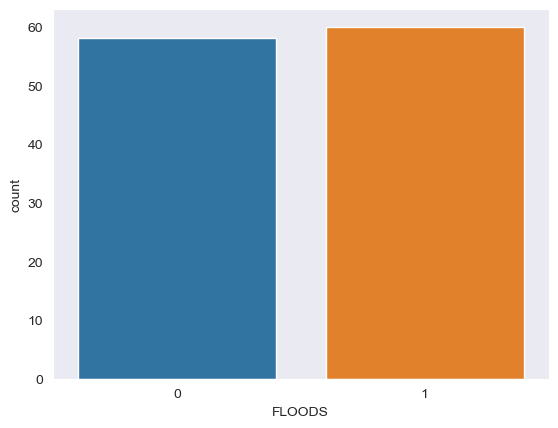

In [92]:
sns.countplot(data=df,x='FLOODS')

- In this fig flood occured is higher than not occured 

In [96]:
flood_occ = df[df['FLOODS']==1]
flood_occ.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1


In [97]:
flood_not_occ = df[df['FLOODS']==0]
flood_not_occ.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
5,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,0
9,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,0
10,1911,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6,2726.7,0


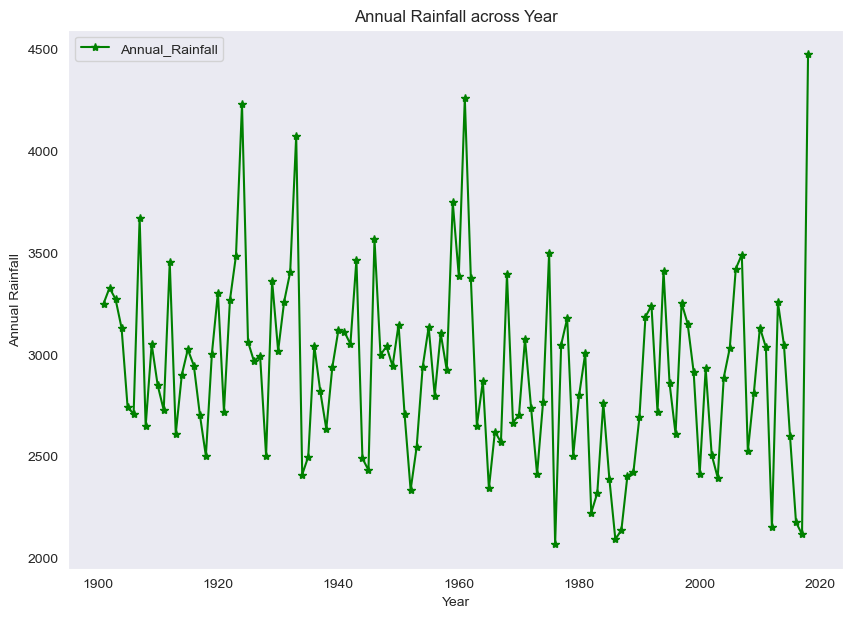

In [104]:
plt.figure(figsize=(10,7))
plt.plot(df['YEAR'],df['ANNUAL RAINFALL'],color='green',marker='*',label='Annual_Rainfall')
plt.title('Annual Rainfall across Year')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.legend()
plt.show()

In [8]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [9]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


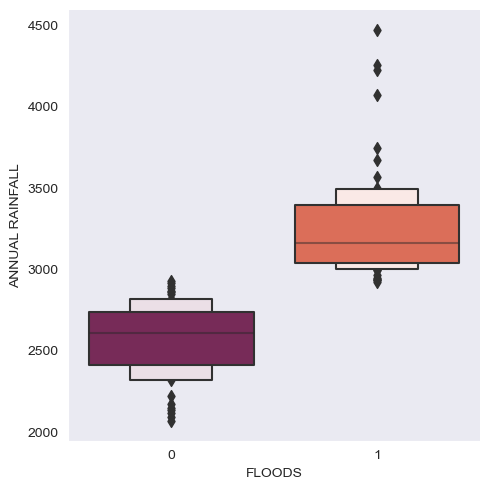

In [19]:
sns.catplot(data=df,x='FLOODS',y='ANNUAL RAINFALL',kind='boxen',palette='rocket')
plt.show()

In [18]:
from sklearn import preprocessing

In [19]:
label_enc = preprocessing.LabelEncoder()

In [20]:
df['FLOODS']=label_enc.fit_transform(df['FLOODS'])

In [21]:
X = df.drop(columns='FLOODS')
y = df['FLOODS']

Lets split the data

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=22,test_size=0.2)

In [27]:
X_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
92,1993,0.0,17.8,20.1,66.5,159.0,657.1,776.1,301.9,88.0,431.2,153.8,46.2,2717.7
101,2002,4.7,8.7,35.7,117.3,330.8,503.1,318.7,438.2,99.0,511.7,137.5,2.1,2507.4
74,1975,5.2,21.4,63.4,123.8,162.2,864.4,531.3,675.9,457.7,368.9,204.3,19.9,3498.4
98,1999,1.8,23.8,21.4,111.6,453.2,607.3,700.4,266.3,88.0,567.9,68.1,4.9,2914.6
96,1997,2.1,1.5,36.1,60.6,133.6,544.2,970.5,536.0,292.2,288.9,298.4,88.4,3252.4


In [28]:
y_train.head()

92     0
101    0
74     1
98     0
96     1
Name: FLOODS, dtype: int64

In [29]:
X_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
30,1931,3.3,0.3,19.2,126.9,131.7,541.7,653.9,1199.2,163.2,149.3,164.3,106.5,3259.6
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3,3076.8
83,1984,36.8,60.0,95.3,162.1,84.6,842.6,653.6,284.4,171.1,286.0,67.7,18.0,2762.1
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8,2412.5
79,1980,0.0,0.9,20.8,114.8,105.3,745.9,754.0,438.1,139.5,282.3,162.3,39.5,2803.4


In [30]:
y_test.head()

30    1
70    1
83    0
72    0
79    0
Name: FLOODS, dtype: int64

Creating Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()

In [34]:
logreg

LogisticRegression()

In [35]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = logreg.predict(X_test)

In [37]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [41]:
acc = accuracy_score(y_test,y_pred)
acc

1.0

In [42]:
pre = precision_score(y_test,y_pred)
pre

1.0

In [43]:
rec = recall_score(y_test,y_pred)
rec

1.0

In [44]:
f1 = f1_score(y_test,y_pred)
f1

1.0